In [47]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
import bitstring
from qiskit_aer import AerSimulator
from qiskit.transpiler.passes.synthesis import SolovayKitaev
from qiskit.synthesis import generate_basic_approximations
from qiskit.quantum_info import Operator

from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

from qiskit.circuit.library import UnitaryGate

In [48]:
qc = QuantumCircuit(1)

qc.rz(np.pi/8, 0)

print("Original circuit:")
print(qc.draw())
 
basis = ["t", "tdg", "z", "h"]
approx = generate_basic_approximations(basis, depth=3)
skd = SolovayKitaev(recursion_degree=2, basic_approximations=approx)
 
discretized = skd(qc)
 
print("Discretized circuit:")
print(discretized.draw())
 
print("Error:", np.linalg.norm(Operator(qc).data - Operator(discretized).data))

#discretized.draw("mpl")

Original circuit:
   ┌─────────┐
q: ┤ Rz(π/8) ├
   └─────────┘
Discretized circuit:
   ┌───┐┌───┐┌─────┐┌───┐┌─────┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌─────┐┌───┐»
q: ┤ T ├┤ H ├┤ Tdg ├┤ H ├┤ Tdg ├┤ H ├┤ T ├┤ H ├┤ T ├┤ H ├┤ T ├┤ H ├┤ Tdg ├┤ H ├»
   └───┘└───┘└─────┘└───┘└─────┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└─────┘└───┘»
«   ┌─────┐┌───┐
«q: ┤ Tdg ├┤ H ├
«   └─────┘└───┘
Error: 0.07944281142466891


In [49]:
qc = QuantumCircuit(1)

qc.rz(-np.pi/8, 0)

print("Original circuit:")
print(qc.draw())
 
basis = ["t", "tdg", "z", "h"]
approx = generate_basic_approximations(basis, depth=3)
skd = SolovayKitaev(recursion_degree=2, basic_approximations=approx)
 
discretized1 = skd(qc)
 
print("Discretized circuit:")
print(discretized1.draw())
 
print("Error:", np.linalg.norm(Operator(qc).data - Operator(discretized1).data))

#discretized.draw("mpl")

Original circuit:
   ┌──────────┐
q: ┤ Rz(-π/8) ├
   └──────────┘
Discretized circuit:
   ┌───┐┌───┐┌───┐┌───┐┌───┐┌─────┐┌───┐┌─────┐┌───┐┌─────┐┌───┐┌───┐┌───┐┌───┐»
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ H ├┤ Tdg ├┤ H ├┤ Tdg ├┤ H ├┤ Tdg ├┤ H ├┤ T ├┤ H ├┤ T ├»
   └───┘└───┘└───┘└───┘└───┘└─────┘└───┘└─────┘└───┘└─────┘└───┘└───┘└───┘└───┘»
«   ┌───┐┌─────┐
«q: ┤ H ├┤ Tdg ├
«   └───┘└─────┘
Error: 0.07944281142466901


In [50]:
def solovay(qc: QuantumCircuit, discretized, pos):
    hmm = discretized.data
    for instruction in hmm:
        if instruction.name == "t":
            qc.t(pos)
        if instruction.name == "tdg":
            qc.tdg(pos)
        if instruction.name == "h":
            qc.h(pos)


{'1': 1463652, '0': 8536348}


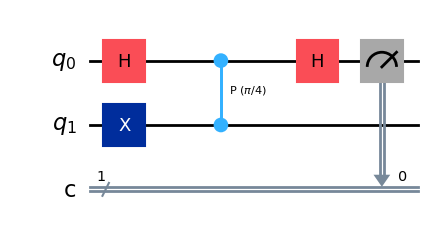

In [63]:
qr = QuantumRegister(2,"q")
cbits = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cbits)

qc.x(1)
qc.h(0)

qc.cp(np.pi/4, 0, 1)

# qc.p(np.pi/8, 0)
# qc.p(np.pi/8, 1)
# qc.cx(0,1)
# qc.p(-np.pi/8,1)
# qc.cx(0,1)


# solovay(qc, discretized=discretized, pos=0)
# solovay(qc, discretized=discretized, pos=1)
# qc.cx(0,1)
# solovay(qc, discretized=discretized1, pos=1)
# qc.cx(0,1)



qc.h(0)
qc.measure(0,0)

sim = AerSimulator()
    
job = sim.run(qc, shots=10000000)

result = job.result()
counts = result.get_counts()

print(counts)

qc.draw("mpl")